# CPS 840 / CP 8318
# Assignment 1 - [Awale Hassan] - [500704868]
## Part 1 [20 Marks]

[6 Marks] 
# a

Write a simple implementation of a least-squares solution to linear regression that applies an iterative update to adjust the weights. Demonstrate the success of your approach on the sample data loaded below, and visualize the best fit plotted as a line (consider using linspace) against a scatter plot of the x and y test values.


In [4]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20] #everything but last twenty
diabetes_X_test = diabetes_X[-20:] #last twenty items

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]




Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


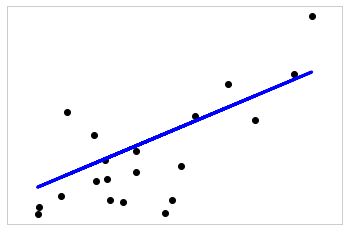

In [5]:
##### YOUR CODE HERE #######


%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')


xMean = sum(diabetes_X_train)/len(diabetes_X_train)
yMean = sum(diabetes_y_train)/len(diabetes_y_train)
regPoint= [xMean,yMean]
xTrainMinusMean = list(map(lambda x:x - xMean, diabetes_X_train))
yTrainMinusMean = list(map(lambda y:y - yMean, diabetes_y_train))
xTrainMinusMeanSquare = list(map(lambda f:f**2,xTrainMinusMean))
b1 = (sum(xTrainMinusMean)*sum(yTrainMinusMean)) / sum(xTrainMinusMeanSquare)
b0 = yMean - (b1*xMean)

x = np.linspace(0, 10, 30)
y = np.sin(x)

#Up to here has been my own code, essentially defining the equation y = b0 + b1x, where y = yMean and x = xMean

#This is code taken from the scikit-learn api, defining what should actually happen
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()






[2 Marks]
# b

Load data on movie ratings, revenue, metadata etc. Split data into a relevant set for training, testing and classification. Explain your choice of split. It is ok if you decide to split into these subsets after part c -> if you do so, mention this at the end of your explanation.

Explanation: Removed all values where revenue = 0.0 as that could very easily scew our results.


In [6]:
### An example to load a csv file
import pandas as pd 
import numpy as np
from ast import literal_eval
meta_data=pd.read_csv('movies_metadata.csv', low_memory=False) # You may wish to specify types, or process columns once read
ratings_small=pd.read_csv('ratings_small.csv')
import warnings; warnings.simplefilter('ignore')

##### YOUR CODE HERE #######
#defined down below



[5 Marks]
# c

Organize the data into relevant features for predicting revenue. <br>
i.  Explain your feature sets and organization. <br>

Removed any non-numerical value for features. Kept budget and popularity from movie metadata.  

ii. Plot movie revenue vs. rating as a scatter plot and discuss your findings. <br>

It appears that movies with a rating between 6 and 8 make the most revenue, while movies outside of that range tend to make much less. 

iii. Visualize any other relationships you deem interesting and explain. <br>

It appears that, over time movies are generating more revenue, as shown by the revenue/years scatterplot. 


          budget                                             genres      id  \
0       30000000                        [Animation, Comedy, Family]     862   
1       65000000                       [Adventure, Fantasy, Family]    8844   
3       16000000                           [Comedy, Drama, Romance]   31357   
4              0                                           [Comedy]   11862   
5       60000000                   [Action, Crime, Drama, Thriller]     949   
8       35000000                      [Action, Adventure, Thriller]    9091   
9       58000000                      [Adventure, Action, Thriller]     710   
10      62000000                           [Comedy, Drama, Romance]    9087   
12             0                     [Family, Animation, Adventure]   21032   
13      44000000                                   [History, Drama]   10858   
14      98000000                                [Action, Adventure]    1408   
15      52000000                                    

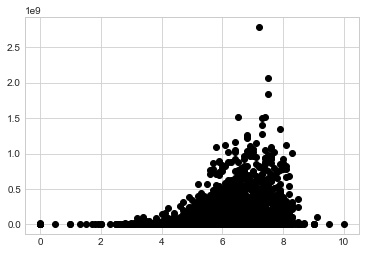

In [21]:
#meta_data.head(1)
#The following line is one way of cleaning up the genres field - there are more verbose ways of doing this that are easier for a human to read
#meta_data.head()
# Consider how to columns look before and after this 'clean-up' - it is very common to have to massage the data to get the right features

##### YOUR CODE HERE #######

import pandas as pd 
import numpy as np
from ast import literal_eval
meta_data=pd.read_csv('movies_metadata.csv', low_memory=False) # You may wish to specify types, or process columns once read
ratings_small=pd.read_csv('ratings_small.csv')
import warnings; warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split

meta_data['genres'] = meta_data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
meta_data['year'] = pd.to_datetime(meta_data['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as pplt
plt.style.use('seaborn-whitegrid')
import numpy as np
meta_data = meta_data.drop(columns=['adult',"belongs_to_collection","homepage","imdb_id","original_language","original_title","overview","poster_path","production_companies","production_countries","spoken_languages","status","tagline","title","video"])
meta_data = meta_data[meta_data.revenue != 0.0]
meta_data = meta_data[meta_data.budget != '/zaSf5OG7V8X8gqFvly88zDdRm46.jpg']
print(meta_data)
plt.scatter(meta_data.vote_average, meta_data.revenue,  color='black')
#plt.scatter(meta_data.vote_average, meta_data.year,  color='black')
y = meta_data.revenue
X = meta_data.drop(columns=["revenue"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("\nX_train\n")
print(X_train.head())
print("\nY_train\n")
print(y_train.head())






[3 Marks]
# d

Train a regression model to predict movie revenue. Plot predicted revenue vs. actual revenue on the test set. Quantify the error in your prediction. (You may use sklearn for this step)

In [22]:
# Regression model here, plot your fit to the revenue data versus the actual data from the test set as a scatter plot.

##### YOUR CODE HERE #######
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

regr = LinearRegression()
regr.fit(X_train.budget, y_train)



ValueError: could not convert string to float: '/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg'

[4 Marks]
# e

Try a non-linear fit to the data, with and without regularization. Find your best fit and justify the choice of parameters, regularization constant and norm. Plot predicted revenue vs. actual revenue on the test set. In each case, quantify the error. (See e.g. Generalized linear models, Kernel Ridge regression, SVR and others from sklearn)

In [22]:
##### YOUR CODE HERE WITHOUT REGULARIZATION #######

In [23]:
##### YOUR CODE HERE WITH REGULARIZATION #######

## Part 2 [10 Marks]

[4 Marks]
# a

Write a simple version of the basic algorithm for k-means clustering. Simple here means the core of the algorithm and not optimizations or extensions you might find in standard python libraries. Typically you might rely on a standard library for doing this, but it helps to see the core by manipulating the data and labels by hand as practice for numerical python and how to frame the algorithm.

[[2. 7.]
 [5. 2.]
 [4. 5.]
 [2. 0.]]


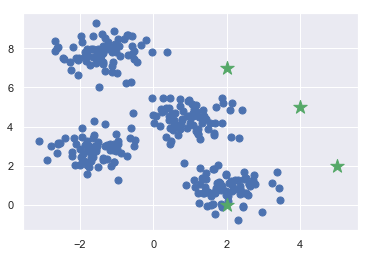

In [24]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np


# Generate Samples
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

###############################################
# YOUR CODE GOES HERE
# Put some code to find clusters here
# Assign the clusters and labels in your code
###############################################
k =4

clusterX = np.random.randint(0, np.max(X), size=k)
clusterY = np.random.randint(0, np.max(X), size=k)
c = np.array(list(zip(clusterX,clusterY)), dtype=np.float32)
print(c)
plt.scatter(clusterX, clusterY, marker='*', s=200, c='g')

c_old = np.zeros(c.shape)



# Uncomment to display clusters and cluster centers
#plt.scatter(X[:, 0], X[:, 1], c=labels,
            #s=50, cmap='viridis')
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

<a id="data set"></a>
[6 Marks]
# b

Load the mystery data below, and cluster the data (you don't need to use your code from part a). Visualize the data including assigned cluster labels.

In [48]:
# Load the mystery data here and cluster using k-means (now you can use libraries e.g. sklearn)
import numpy as np
mystery = np.load('mystery.npy')
mystery.shape


(30309, 784)

No handles with labels found to put in legend.


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


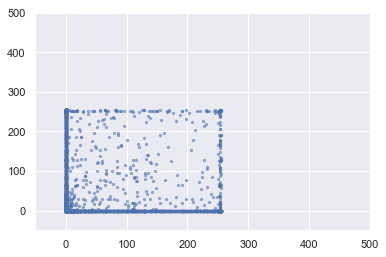

In [52]:
# Find a way to visualize the data (e.g. in 2D or 3D), color datapoints based on assigned labels.
from matplotlib import pyplot as plt
from PIL import Image

plt.xlim([-50,500])
plt.ylim([-50,500])
#plt.imshow(mystery, cmap='gray')
X = np.matrix(mystery)
kmeans = KMeans(n_clusters=5).fit(mystery)
plt.scatter(mystery[:,0], mystery[:,1], s=5, cmap='viridis', alpha = 0.5)
print(kmeans)

plt.legend()
plt.show()



Based on the results above and any other analysis you wish to include, discuss how many clusters you see in the data.

YOUR EXPLANATION HERE

(any additional code supporting your assertion on the number of clusters may be included below)

In [64]:
##### YOUR (OPTIONAL) CODE HERE #######

[2 Marks]
# Bonus

What is the mystery data in part 2? Show this in markdown and code below.

EXPLANATION HERE, code goes below.

In [28]:
##### YOUR (OPTIONAL) CODE HERE #######

[10 Marks]
# CP 8318 Questions

Describe how you might implement a solution to recommend new movies to a user based on their existing preferences or ratings from Part 1.

YOUR EXPLANATION HERE, provide an example for one user id below.

In [29]:
##### YOUR CODE HERE #######
